In [1]:
import decile_analysis as da
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('customer_data.csv')
df.drop(['RowNumber','CustomerId','Surname','Geography','Gender'],axis = 1,inplace = True)

X= df.drop('Exited',axis = 1)
y= df['Exited']


X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

print(X_train.shape,y_train.shape)
model = LogisticRegression()
model.fit(X_train,y_train)

train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)
print(train_score,test_score)

y_predicted = model.predict_proba(X_test)
ones_proba = [y_predicted[i][1] for i in range(len(y_predicted))]

(7500, 8) (7500,)
0.7925333333333333 0.7876


In [2]:
decile_frame = da.decile_df(y_test,ones_proba)
decile_frame

,decile,no_responders,no_individuals,response_rate,% of responders
0,9,118,250,47.2,22.692308
1,8,70,250,28.0,13.461538
2,7,77,250,30.8,14.807692
3,6,54,250,21.6,10.384615
4,5,52,250,20.8,10.000000
5,4,39,250,15.6,7.500000
6,3,38,250,15.2,7.307692
7,2,34,250,13.6,6.538462
8,1,29,250,11.6,5.576923
9,0,9,250,3.6,1.730769


In [3]:
cumulative_df = da.get_cum_gain_df(decile_frame)
cumulative_df

,cum_individuals,cum_reponses,gain,lift_value
0,250,118,22.692308,2.269231
1,500,188,36.153846,1.807692
2,750,265,50.961538,1.698718
3,1000,319,61.346154,1.533654
4,1250,371,71.346154,1.426923
5,1500,410,78.846154,1.314103
6,1750,448,86.153846,1.230769
7,2000,482,92.692308,1.158654
8,2250,511,98.269231,1.091880
9,2500,520,100.000000,1.000000


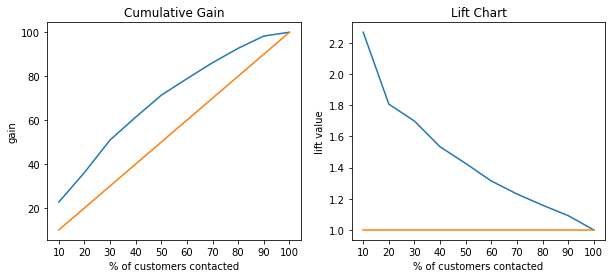

In [4]:
da.plot_lift_gain(cumulative_df,y_test,ones_proba)